In [129]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [130]:
pd.set_option('display.max_colwidth', None)

In [131]:
df = pd.read_csv('../Data/data.csv')

In [132]:
df.fillna(method='ffill', inplace=True)

C:\Users\sachi\AppData\Local\Temp\ipykernel_31840\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


### Checking Null values

In [133]:
df.isnull().sum()

Agreement Number                         0
Disbursement Date                        0
Loan Amount                              0
Number of Ornaments                      0
Gross Auction Weight of Ornaments(gm)    0
Auction Date                             0
Auction Place                            0
Branch Address                           0
dtype: int64

### Sample from dataset

In [134]:
df.head()

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address
0,PV97SGL7830716,18-May-23,80099.0,1,21.1,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001"
1,PV97SGL7844024,19-May-23,57799.0,1,14.0,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001"
2,PV97SGL7918636,25-May-23,19599.0,1,5.2,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001"
3,PV97SGL8121108,13-Jun-23,48258.0,1,11.8,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001"
4,PV97SGL8143786,15-Jun-23,145174.0,1,35.5,12-Aug-24,Adilabad - Dwaraka nagar,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001"


In [135]:
df_historical = pd.read_csv('../Data/XAU_INR Historical Data.csv')

### Sample from Historical data

In [136]:
df_historical

,Date,Price,Open,High,Low,Vol.,Change %
0,10-10-2024,"219,502","219,004","219,690","218,771",NaN,0.27%
1,09-10-2024,"218,918","220,171","220,310","218,734",NaN,-0.52%
2,08-10-2024,"220,062","221,961","222,771","218,731",NaN,-0.82%
3,07-10-2024,"221,887","222,775","223,425","221,568",NaN,-0.47%
4,04-10-2024,"222,933","223,121","224,308","221,197",NaN,-0.04%
...,...,...,...,...,...,...,...
1516,18-12-2018,"88,198","89,221","89,429","87,871",NaN,-1.10%
1517,17-12-2018,"89,176","89,008","89,398","88,585",NaN,0.16%
1518,14-12-2018,"89,033","88,827","89,277","88,736",NaN,0.26%
1519,13-12-2018,"88,804","89,517","89,581","88,685",NaN,-0.71%


### Columns of Historical Data

In [137]:
df_historical.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

### Columns of Dataset

In [138]:
df.columns

Index(['Agreement Number', 'Disbursement Date', 'Loan Amount',
       'Number of Ornaments', 'Gross Auction Weight of Ornaments(gm)',
       'Auction Date', 'Auction Place', 'Branch Address'],
      dtype='object')

In [139]:
numerical_columns = ['Loan Amount','Number of Ornaments', 'Gross Auction Weight of Ornaments(gm)']

In [140]:
plt.rcParams.update({'font.size': 13})

### Loan amount distribution

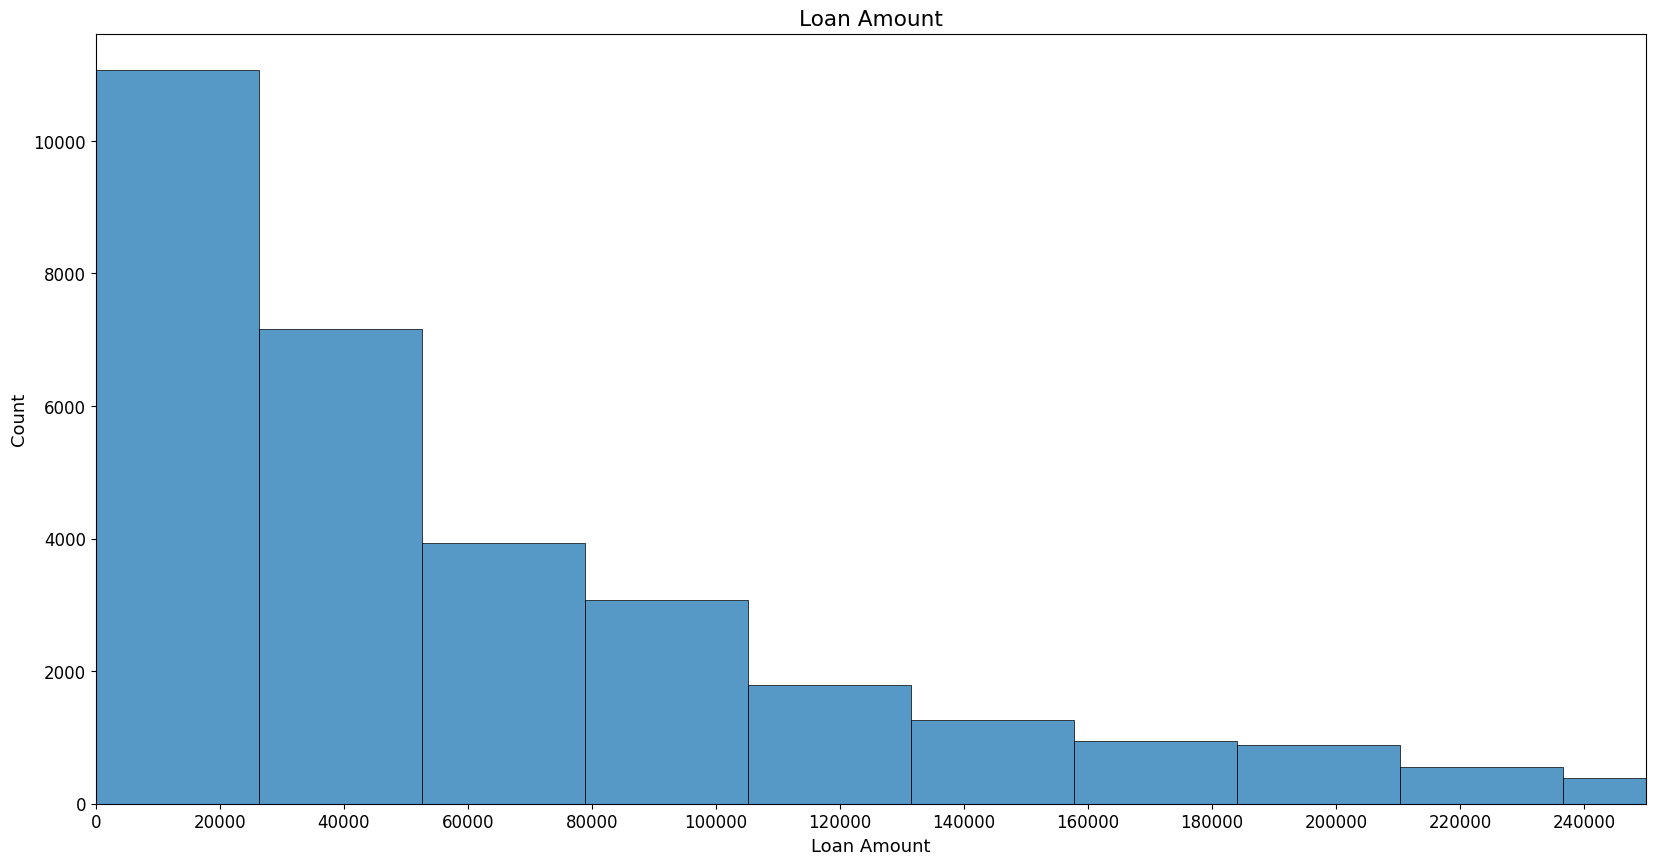

In [141]:

plt.figure(figsize=(20, 10))
sns.histplot(df['Loan Amount'], bins=200)
plt.title('Loan Amount')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(df['Loan Amount'])+1, 20000))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.xlim(0, 250000)
plt.show()

### Number of ornaments distribution

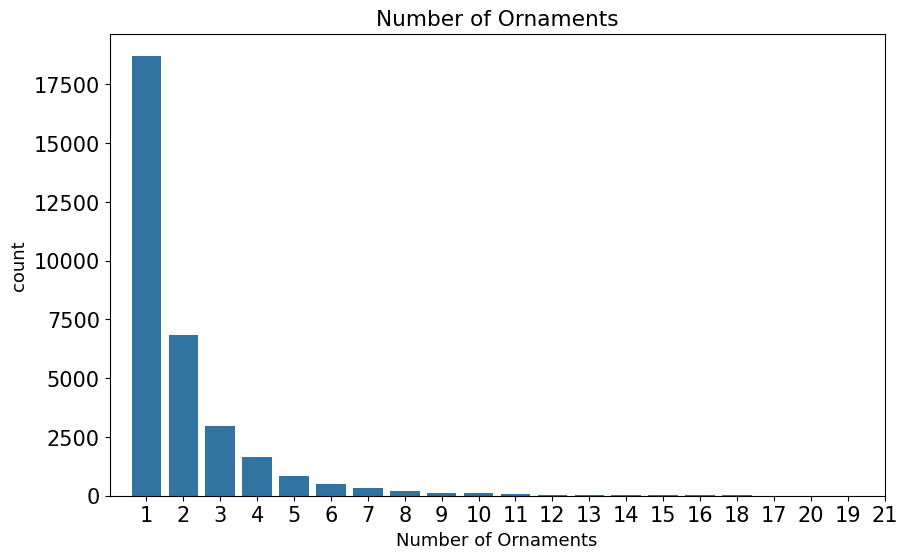

In [142]:
# 5. Loan Cycle
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of Ornaments', data=df, order=df['Number of Ornaments'].value_counts().index)
plt.title('Number of Ornaments')
plt.xlim(-1,20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.show()

### Distribution of Ornament Weight (gm)

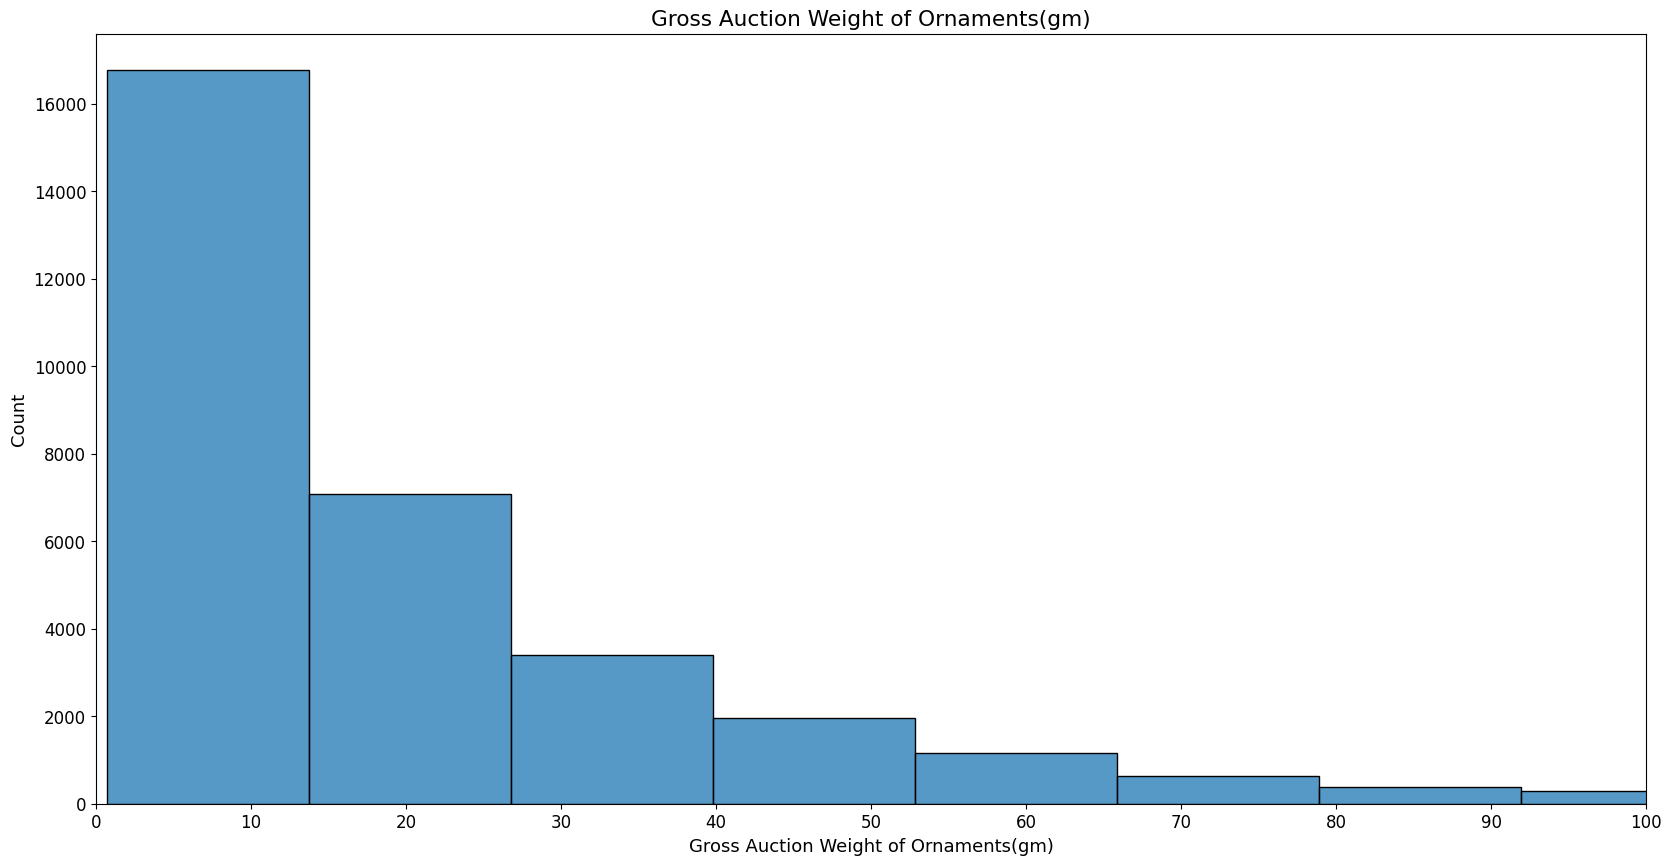

In [143]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Gross Auction Weight of Ornaments(gm)'], bins=100)
plt.title('Gross Auction Weight of Ornaments(gm)')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(df['Gross Auction Weight of Ornaments(gm)'])+1, 10))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlim(0,100) 
plt.show()

### Correlation between Loan Amount and Gross Auction Weight of Ornaments(gm)

In [144]:
df['Loan Amount'].corr(df['Gross Auction Weight of Ornaments(gm)'])

np.float64(0.8613470226275941)

In [145]:
from datetime import datetime

def convert_date(x):
    for fmt in ['%d-%b-%y', '%d-%b-%Y', '%d-%m-%Y']:
        try:
            # Parse the date and return in dd-mm-yyyy format
            return datetime.strptime(x, fmt).strftime('%d-%m-%Y')
        except ValueError:
            continue  # Try the next format
    return None  # Return None if no formats matched


In [146]:
df['Auction Date'] = df['Auction Date'].apply(convert_date)

In [147]:
df_historical

,Date,Price,Open,High,Low,Vol.,Change %
0,10-10-2024,"219,502","219,004","219,690","218,771",NaN,0.27%
1,09-10-2024,"218,918","220,171","220,310","218,734",NaN,-0.52%
2,08-10-2024,"220,062","221,961","222,771","218,731",NaN,-0.82%
3,07-10-2024,"221,887","222,775","223,425","221,568",NaN,-0.47%
4,04-10-2024,"222,933","223,121","224,308","221,197",NaN,-0.04%
...,...,...,...,...,...,...,...
1516,18-12-2018,"88,198","89,221","89,429","87,871",NaN,-1.10%
1517,17-12-2018,"89,176","89,008","89,398","88,585",NaN,0.16%
1518,14-12-2018,"89,033","88,827","89,277","88,736",NaN,0.26%
1519,13-12-2018,"88,804","89,517","89,581","88,685",NaN,-0.71%


In [148]:
df_historical['Date'] = df_historical['Date'].apply(convert_date)


In [149]:
df_historical

,Date,Price,Open,High,Low,Vol.,Change %
0,10-10-2024,"219,502","219,004","219,690","218,771",NaN,0.27%
1,09-10-2024,"218,918","220,171","220,310","218,734",NaN,-0.52%
2,08-10-2024,"220,062","221,961","222,771","218,731",NaN,-0.82%
3,07-10-2024,"221,887","222,775","223,425","221,568",NaN,-0.47%
4,04-10-2024,"222,933","223,121","224,308","221,197",NaN,-0.04%
...,...,...,...,...,...,...,...
1516,18-12-2018,"88,198","89,221","89,429","87,871",NaN,-1.10%
1517,17-12-2018,"89,176","89,008","89,398","88,585",NaN,0.16%
1518,14-12-2018,"89,033","88,827","89,277","88,736",NaN,0.26%
1519,13-12-2018,"88,804","89,517","89,581","88,685",NaN,-0.71%


In [150]:
df['Auction Date'] = pd.to_datetime(df['Auction Date'],format='%d-%m-%Y')
df_historical['Date'] = pd.to_datetime(df_historical['Date'],format='%d-%m-%Y')


In [151]:
df_merged = pd.merge_asof(df.sort_values('Auction Date'), 
                           df_historical.sort_values('Date'), 
                           left_on='Auction Date', 
                           right_on='Date', 
                           direction='backward')

In [152]:
df_merged.columns

Index(['Agreement Number', 'Disbursement Date', 'Loan Amount',
       'Number of Ornaments', 'Gross Auction Weight of Ornaments(gm)',
       'Auction Date', 'Auction Place', 'Branch Address', 'Date', 'Price',
       'Open', 'High', 'Low', 'Vol.', 'Change %'],
      dtype='object')

In [153]:
df_merged = df_merged.rename(columns={'Price': 'OnAuctionDate(Troy ounces)'})
df_merged = df_merged.drop(columns=['Date','Open', 'High', 'Low', 'Vol.', 'Change %'])

In [154]:
df_merged['Disbursement Date'] = df_merged['Disbursement Date'].apply(convert_date)
df_merged['Disbursement Date'] = pd.to_datetime(df_merged['Disbursement Date'],format='%d-%m-%Y')

In [155]:
df_merged = pd.merge_asof(df_merged.sort_values('Disbursement Date'), 
                           df_historical.sort_values('Date'), 
                           left_on='Disbursement Date', 
                           right_on='Date', 
                           direction='backward')

In [162]:
df_merged = df_merged.rename(columns={'Price': 'OnDisbursementDate(Troy ounces)'})
df_merged = df_merged.drop(columns=['Date','Open', 'High', 'Low', 'Vol.', 'Change %'])

In [163]:
df_merged['OnAuctionDate(Troy ounces)'] = df_merged['OnAuctionDate(Troy ounces)'].str.replace(',', '')

df_merged['OnAuctionDate(Troy ounces)'] = pd.to_numeric(df_merged['OnAuctionDate(Troy ounces)'])
df_merged['OnAuctionDate(Troy ounces)'] = df_merged['OnAuctionDate(Troy ounces)'] * 0.916
df_merged['OnDisbursementDate(Troy ounces)'] = df_merged['OnDisbursementDate(Troy ounces)'].str.replace(',', '')

df_merged['OnDisbursementDate(Troy ounces)'] = pd.to_numeric(df_merged['OnDisbursementDate(Troy ounces)'])
df_merged['OnDisbursementDate(Troy ounces)'] = df_merged['OnDisbursementDate(Troy ounces)'] * 0.916

df_merged['Gross Auction Weight of Ornaments(gm)'] = pd.to_numeric(df_merged['Gross Auction Weight of Ornaments(gm)'])
df_merged['Loan Amount'] = pd.to_numeric(df_merged['Loan Amount'])


In [164]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32570 entries, 0 to 32569
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Agreement Number                       32570 non-null  object        
 1   Disbursement Date                      32570 non-null  datetime64[ns]
 2   Loan Amount                            32570 non-null  float64       
 3   Number of Ornaments                    32570 non-null  int64         
 4   Gross Auction Weight of Ornaments(gm)  32570 non-null  float64       
 5   Auction Date                           32570 non-null  datetime64[ns]
 6   Auction Place                          32570 non-null  object        
 7   Branch Address                         32570 non-null  object        
 8   OnAuctionDate(Troy ounces)             32570 non-null  float64       
 9   OnDisbursementDate(Troy ounces)        32570 non-null  float6

In [166]:
df_merged['PricePerGramOnAuctionDate'] = df_merged['OnAuctionDate(Troy ounces)'] / 31.1035

df_merged['ValueOnAuctionDate'] = df_merged['PricePerGramOnAuctionDate'] * df_merged['Gross Auction Weight of Ornaments(gm)']

In [167]:
df_merged['PricePerGramOnDisbursementDate'] = df_merged['OnDisbursementDate(Troy ounces)'] / 31.1035

df_merged['ValueOnDisbursementDate'] = df_merged['PricePerGramOnDisbursementDate'] * df_merged['Gross Auction Weight of Ornaments(gm)']

In [168]:
df_merged.head()

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address,OnAuctionDate(Troy ounces),OnDisbursementDate(Troy ounces),PricePerGramOnAuctionDate,ValueOnAuctionDate,PricePerGramOnDisbursementDate,ValueOnDisbursementDate
0,PU40GOL1651182,2020-05-11,30040.0,1,11.7,2024-10-16,KORAPUT,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",201063.832,117836.988,6464.347485,75632.865575,3788.544312,44325.968447
1,PU40GOL1653089,2020-05-12,19540.0,2,7.2,2024-10-16,KORAPUT,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",201063.832,116980.528,6464.347485,46543.301892,3761.008504,27079.261228
2,PU40GOL1662289,2020-05-15,24035.0,1,10.6,2024-10-16,KORAPUT,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",201063.832,120935.816,6464.347485,68522.083341,3888.173871,41214.643034
3,PU40GOL1664576,2020-05-16,25035.0,2,11.3,2024-10-16,KORAPUT,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",201063.832,120935.816,6464.347485,73047.126581,3888.173871,43936.364744
4,PU40GOL1671078,2020-05-19,17535.0,2,6.5,2024-10-16,KORAPUT,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",201063.832,120805.744,6464.347485,42018.258653,3883.991962,25245.947755


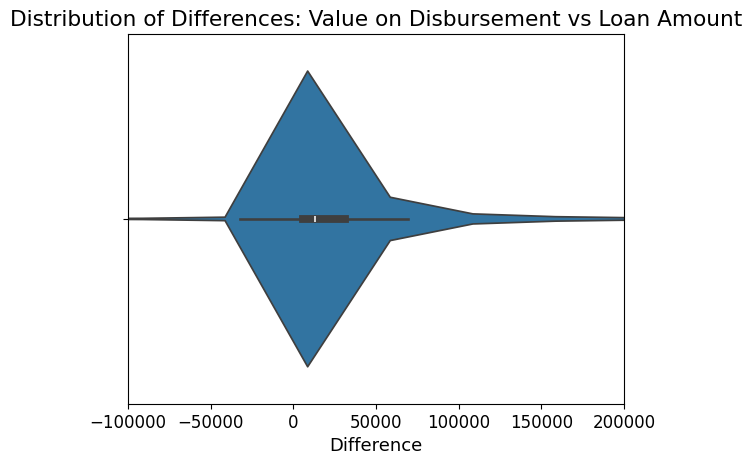

In [176]:
difference = df_merged['ValueOnDisbursementDate'] - df_merged['Loan Amount']

sns.violinplot(x=difference)
plt.title('Distribution of Differences: Value on Disbursement vs Loan Amount')
plt.xlim(-100000,200000)
plt.xlabel('Difference')

plt.show()

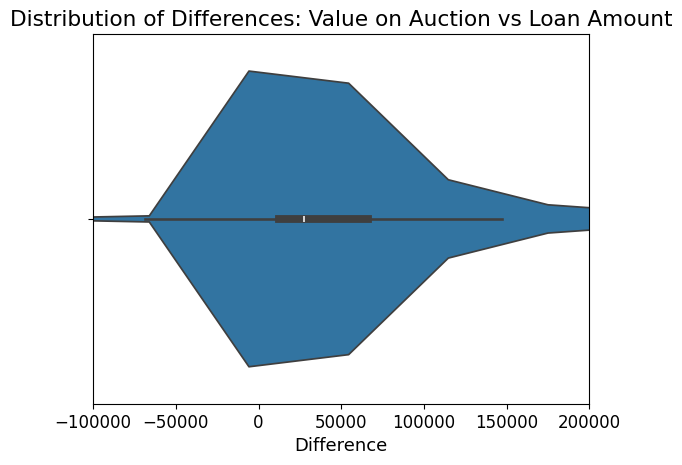

In [177]:
difference = df_merged['ValueOnAuctionDate'] - df_merged['Loan Amount']

sns.violinplot(x=difference)
plt.title('Distribution of Differences: Value on Auction vs Loan Amount')
plt.xlim(-100000,200000)
plt.xlabel('Difference')
plt.show()

Mean Difference: 31490.93
Median Difference: 12833.73
Loss making Disbursement: 1012
Accounts with high stress (Threshold 20%): 18790
5-Point Summary:
min   -1017386.05
25%       5807.30
50%      12833.73
75%      31261.58
max    3882590.47
dtype: float64


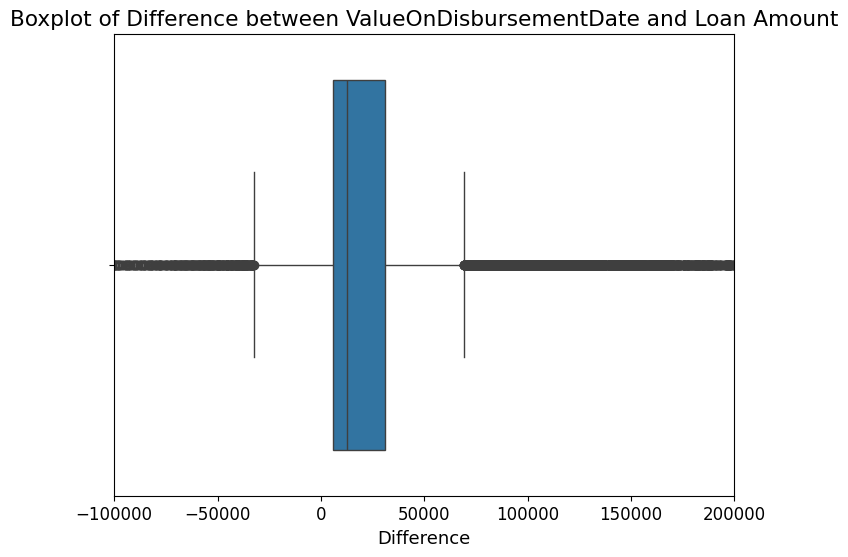

In [178]:
difference = df_merged['ValueOnDisbursementDate'] - df_merged['Loan Amount']
count_diff_less_than_zero = (difference < 0).sum()
mean_diff = difference.mean()
median_diff = difference.median()
percentage_diff = (difference / df_merged['ValueOnDisbursementDate']) * 100

count_greater_than_20_percent = (percentage_diff > 20).sum() 


five_point_summary = difference.describe(percentiles=[0.25, 0.5, 0.75])[['min', '25%', '50%', '75%', 'max']]

pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(f"Mean Difference: {mean_diff:.2f}")
print(f"Median Difference: {median_diff:.2f}")
print(f"Loss making Disbursement: {count_diff_less_than_zero}")
print(f"Accounts with high stress (Threshold 20%): {count_greater_than_20_percent}")
print(f"5-Point Summary:\n{five_point_summary}")


# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=difference)
plt.title('Boxplot of Difference between ValueOnDisbursementDate and Loan Amount')
plt.xlabel('Difference')
plt.xlim(-100000,200000)
plt.show()

In [179]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32570 entries, 0 to 32569
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Agreement Number                       32570 non-null  object        
 1   Disbursement Date                      32570 non-null  datetime64[ns]
 2   Loan Amount                            32570 non-null  float64       
 3   Number of Ornaments                    32570 non-null  int64         
 4   Gross Auction Weight of Ornaments(gm)  32570 non-null  float64       
 5   Auction Date                           32570 non-null  datetime64[ns]
 6   Auction Place                          32570 non-null  object        
 7   Branch Address                         32570 non-null  object        
 8   OnAuctionDate(Troy ounces)             32570 non-null  float64       
 9   OnDisbursementDate(Troy ounces)        32570 non-null  float6

In [180]:
df_merged.iloc[21527]

Agreement Number                                                                                 P6Q8SGL7954337
Disbursement Date                                                                           2023-05-29 00:00:00
Loan Amount                                                                                            97116.00
Number of Ornaments                                                                                           1
Gross Auction Weight of Ornaments(gm)                                                                     23.55
Auction Date                                                                                2024-09-14 00:00:00
Auction Place                                                                          Madanapalle - NTR Circle
Branch Address                           NO1-562 TO 566, BANGALORE  ROAD,  BESIDE PRESS CLUB MADANAPALLE-517325
OnAuctionDate(Troy ounces)                                                                            19

In [181]:
difference[difference < 0]

35       -9229.12
36     -180583.94
38       -8900.58
41      -31942.95
42      -50148.92
          ...    
3211     -9365.87
3217    -17436.59
3219   -101992.74
3223    -27915.51
3231     -6043.76
Length: 1012, dtype: float64

Mean Difference: 59863.71
Median Difference: 27607.93
Loss making Auctions: 917
5-Point Summary:
min   -997467.16
25%     12155.20
50%     27607.93
75%     66201.55
max   4904764.41
dtype: float64


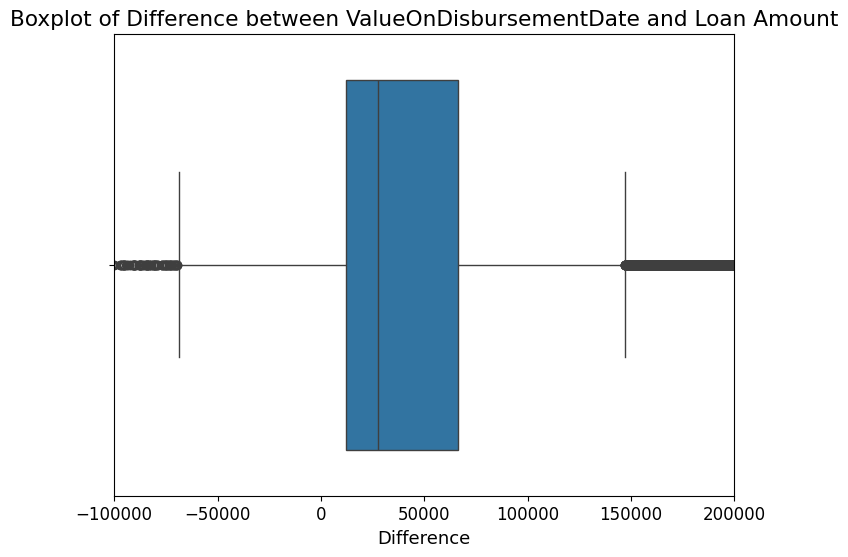

In [183]:
difference = df_merged['ValueOnAuctionDate'] - df_merged['Loan Amount']
count_diff_less_than_zero = (difference < 0).sum()
mean_diff = difference.mean()
median_diff = difference.median()

five_point_summary = difference.describe(percentiles=[0.25, 0.5, 0.75])[['min', '25%', '50%', '75%', 'max']]

pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(f"Mean Difference: {mean_diff:.2f}")
print(f"Median Difference: {median_diff:.2f}")
print(f"Loss making Auctions: {count_diff_less_than_zero}")
print(f"5-Point Summary:\n{five_point_summary}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=difference)
plt.title('Boxplot of Difference between ValueOnDisbursementDate and Loan Amount')
plt.xlabel('Difference')
plt.xlim(-100000,200000)
plt.show()

- ValueOnAuctionDate vs ValueOnDisbursementDate
- weight vs amount line plot
- geography wise 

Mean Difference: 28372.78
Median Difference: 13585.33
5-Point Summary:
min       520.04
25%      5926.39
50%     13585.33
75%     32471.96
max   2303959.04
dtype: float64


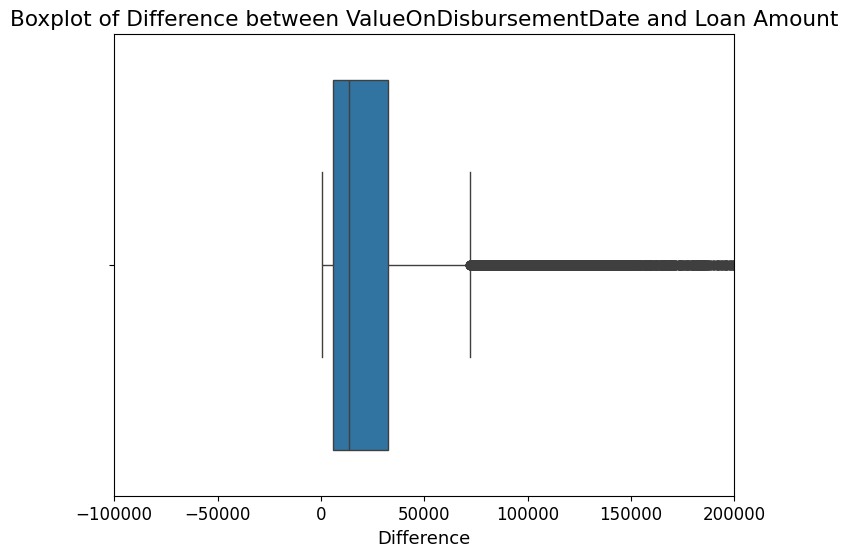

In [184]:
difference = df_merged['ValueOnAuctionDate'] - df_merged['ValueOnDisbursementDate']
count_diff_less_than_zero = (difference < 0).sum()
mean_diff = difference.mean()
median_diff = difference.median()

five_point_summary = difference.describe(percentiles=[0.25, 0.5, 0.75])[['min', '25%', '50%', '75%', 'max']]

# pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(f"Mean Difference: {mean_diff:.2f}")
print(f"Median Difference: {median_diff:.2f}")
# print(f"Loss making Auctions: {count_diff_less_than_zero}")
print(f"5-Point Summary:\n{five_point_summary}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=difference)
plt.title('Boxplot of Difference between ValueOnDisbursementDate and Loan Amount')
plt.xlabel('Difference')
plt.xlim(-100000,200000)
plt.show()